
Source codes for Python Machine Learning By Example 4th Edition (Packt Publishing)

Chapter 6 Predicting Stock Prices with Artificial Neural Networks

Author: Yuxi (Hayden) Liu (yuxi.liu.ece@gmail.com)


# Demystifying neural networks 

## Starting with a single-layer neural network

### Layers in neural networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

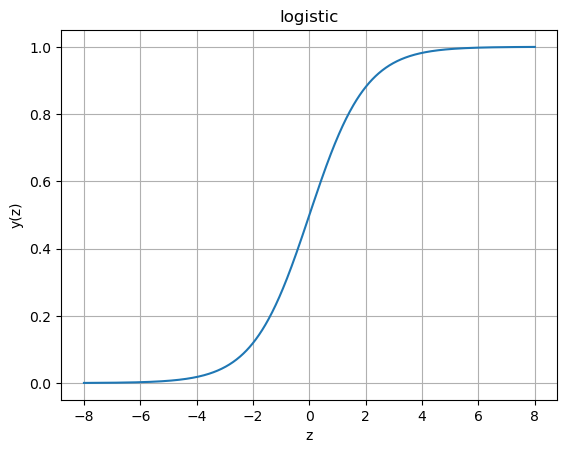

In [2]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('logistic')
plt.grid()
plt.show()


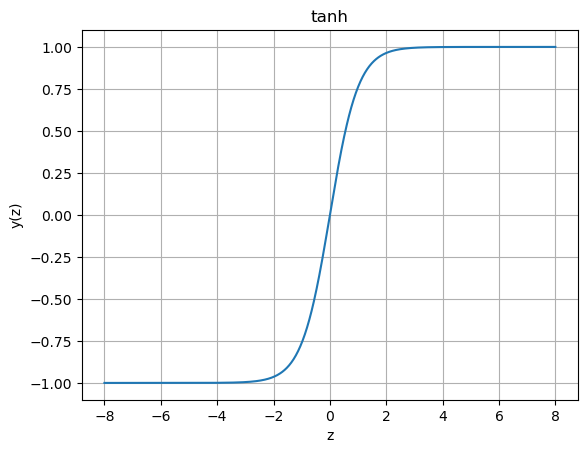

In [3]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

z = np.linspace(-8, 8, 1000)
y = tanh(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('tanh')
plt.grid()
plt.show()


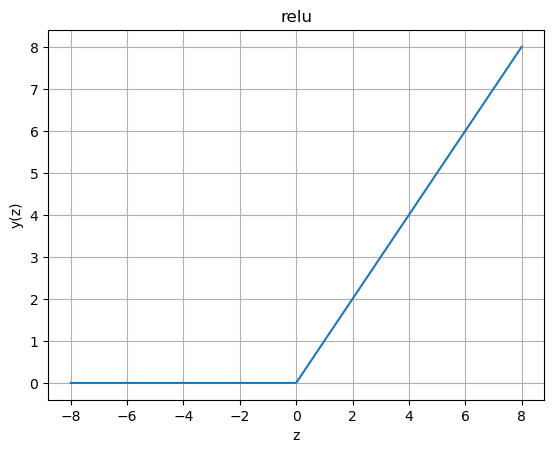

In [4]:
def relu(z):
    return np.maximum(np.zeros_like(z), z)


z = np.linspace(-8, 8, 1000)
y = relu(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('relu')
plt.grid()
plt.show()


# Building neural networks 

## Implementing neural networks from scratch 

In [5]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


In [6]:
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X.shape
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, 1)
    b2 = np.zeros((1, 1))
    for i in range(1, n_iter+1):
        Z2 = np.matmul(X, W1) + b1
        A2 = sigmoid(Z2)
        Z3 = np.matmul(A2, W2) + b2
        A3 = Z3

        dZ3 = A3 - y
        dW2 = np.matmul(A2.T, dZ3)
        db2 = np.sum(dZ3, axis=0, keepdims=True)

        dZ2 = np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1 = np.matmul(X.T, dZ2)
        db1 = np.sum(dZ2, axis=0)

        W2 = W2 - learning_rate * dW2 / m
        b2 = b2 - learning_rate * db2 / m
        W1 = W1 - learning_rate * dW1 / m
        b1 = b1 - learning_rate * db1 / m

        if i % 100 == 0:
            cost = np.mean((y - A3) ** 2)
            print('Iteration %i, training loss: %f' % (i, cost))

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model


In [7]:
from sklearn import datasets
housing = datasets.fetch_california_housing()

num_test = 10  # the last 10 samples as testing set

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = housing.data[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = housing.target[:-num_test].reshape(-1, 1)
X_test = housing.data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = housing.target[-num_test:]


In [8]:
n_hidden = 20
learning_rate = 0.1
n_iter = 2000

model = train(X_train, y_train, n_hidden, learning_rate, n_iter)


Iteration 100, training loss: 0.563233
Iteration 200, training loss: 0.509209
Iteration 300, training loss: 0.482687
Iteration 400, training loss: 0.465535
Iteration 500, training loss: 0.453645
Iteration 600, training loss: 0.444621
Iteration 700, training loss: 0.437521
Iteration 800, training loss: 0.431789
Iteration 900, training loss: 0.427066
Iteration 1000, training loss: 0.423105
Iteration 1100, training loss: 0.419722
Iteration 1200, training loss: 0.416781
Iteration 1300, training loss: 0.414181
Iteration 1400, training loss: 0.411847
Iteration 1500, training loss: 0.409721
Iteration 1600, training loss: 0.407761
Iteration 1700, training loss: 0.405933
Iteration 1800, training loss: 0.404210
Iteration 1900, training loss: 0.402572
Iteration 2000, training loss: 0.401001


In [9]:
def predict(x, model):
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    A2 = sigmoid(np.matmul(x, W1) + b1)
    A3 = np.matmul(A2, W2) + b2
    return A3


In [10]:
predictions = predict(X_test, model)
print(predictions[:, 0])
print(y_test)


[1.05319389 1.05013962 0.9513622  0.81210907 1.00799363 0.46988655
 0.72605512 0.6012157  0.69716363 0.78480349]
[1.12  1.072 1.156 0.983 1.168 0.781 0.771 0.923 0.847 0.894]


## Implementing neural networks with scikit-learn 

In [11]:
from sklearn.neural_network import MLPRegressor
nn_scikit = MLPRegressor(hidden_layer_sizes=(16, 8), 
                         activation='relu', 
                         solver='adam',
                         learning_rate_init=0.001, 
                         random_state=42, 
                         max_iter=2000)

In [12]:
nn_scikit.fit(X_train, y_train.ravel())
predictions = nn_scikit.predict(X_test)
print(predictions)


[1.19968791 1.2725324  1.30448323 0.88688675 1.18623612 0.72605956
 0.87409406 0.85671201 0.93423154 0.94196305]


In [13]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

0.010613171947751738


## Implementing neural networks with TensorFlow

In [14]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)


In [15]:
model = keras.Sequential([
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1)
])


In [16]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.01))


In [17]:
model.fit(X_train, y_train, epochs=300)


Epoch 1/300
645/645 [==============================] - 1s 1ms/step - loss: 0.6298
Epoch 2/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3967
Epoch 3/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3711
Epoch 4/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3600
Epoch 5/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3536
Epoch 6/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3406
Epoch 7/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3381
Epoch 8/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3389
Epoch 9/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3363
Epoch 10/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3296
Epoch 11/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3171
Epoch 12/300
645/645 [==============================] - 1s 1ms/step - loss: 0.3149
Epoch 13/300


645/645 [==============================] - 1s 1ms/step - loss: 0.2786
Epoch 100/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2793
Epoch 101/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2799
Epoch 102/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2825
Epoch 103/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2804
Epoch 104/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2776
Epoch 105/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2769
Epoch 106/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2747
Epoch 107/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2813
Epoch 108/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2807
Epoch 109/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2774
Epoch 110/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2798
Epoch 

645/645 [==============================] - 1s 1ms/step - loss: 0.2789
Epoch 197/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2755
Epoch 198/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2723
Epoch 199/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2751
Epoch 200/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2732
Epoch 201/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2733
Epoch 202/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2733
Epoch 203/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2739
Epoch 204/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2747
Epoch 205/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2727
Epoch 206/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2800
Epoch 207/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2730
Epoch 

645/645 [==============================] - 1s 1ms/step - loss: 0.2707
Epoch 294/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2731
Epoch 295/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2728
Epoch 296/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2704
Epoch 297/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2728
Epoch 298/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2706
Epoch 299/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2758
Epoch 300/300
645/645 [==============================] - 1s 1ms/step - loss: 0.2741


In [18]:
predictions = model.predict(X_test)[:, 0]
print(predictions)

print(mean_squared_error(y_test, predictions))

1/1 [==============================] - 0s 119ms/step
[1.3073633  1.3128996  1.2414817  0.8819487  1.3499548  0.7850624
 0.8059729  0.7850624  0.87567174 0.866796  ]
0.016559217018563877


## Implementing neural networks with PyTorch

In [19]:
import torch
import torch.nn as nn


In [20]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(X_train.shape[1], 16),
                      nn.ReLU(),
                      nn.Linear(16, 8),
                      nn.ReLU(),
                      nn.Linear(8, 1))

In [21]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [22]:
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
y_train_torch = torch.from_numpy(y_train.astype(np.float32))

In [23]:
def train_step(model, X_train, y_train, loss_function, optimizer):
    pred_train = model(X_train)
    loss = loss_function(pred_train, y_train)
 
    model.zero_grad()
    loss.backward()

    optimizer.step()
    
    return loss.item()

In [24]:
for epoch in range(500):
    loss = train_step(model, X_train_torch, y_train_torch, loss_function, optimizer)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} - loss: {loss}")
        

Epoch 0 - loss: 4.908532619476318
Epoch 100 - loss: 0.5002815127372742
Epoch 200 - loss: 0.40820521116256714
Epoch 300 - loss: 0.3870624303817749
Epoch 400 - loss: 0.3720889091491699


In [25]:
X_test_torch = torch.from_numpy(X_test.astype(np.float32))
predictions = model(X_test_torch).detach().numpy()[:, 0]
print(predictions)

print(mean_squared_error(y_test, predictions))

[1.171479  1.130001  1.1055213 0.8627995 1.0910968 0.6725116 0.8869568
 0.8009699 0.8529027 0.8760005]
0.006939044434639928


# Preventing overfitting in neural networks 

## Dropout

In [26]:
torch.manual_seed(42)
model_with_dropout = nn.Sequential(nn.Linear(X_train.shape[1], 16),
                                   nn.ReLU(),
                                   nn.Dropout(0.1),
                                   nn.Linear(16, 8),
                                   nn.ReLU(),
                                   nn.Linear(8, 1))

In [27]:
optimizer = torch.optim.Adam(model_with_dropout.parameters(), lr=0.01)

In [28]:
for epoch in range(1000):
    loss = train_step(model_with_dropout, X_train_torch, y_train_torch, loss_function, optimizer)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} - loss: {loss}")
 

Epoch 0 - loss: 4.921249866485596
Epoch 100 - loss: 0.5313398838043213
Epoch 200 - loss: 0.4458008408546448
Epoch 300 - loss: 0.4264270067214966
Epoch 400 - loss: 0.4085545539855957
Epoch 500 - loss: 0.3640516400337219
Epoch 600 - loss: 0.35677382349967957
Epoch 700 - loss: 0.35208994150161743
Epoch 800 - loss: 0.34980857372283936
Epoch 900 - loss: 0.3431631028652191


In [29]:
model_with_dropout.eval()
predictions = model_with_dropout(X_test_torch).detach().numpy()[:, 0]

print(mean_squared_error(y_test, predictions))

0.005699420832357341


## Early stopping 

In [30]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(X_train.shape[1], 16),
                      nn.ReLU(),
                      nn.Linear(16, 8),
                      nn.ReLU(),
                      nn.Linear(8, 1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [31]:
patience = 100
epochs_no_improve = 0
best_test_loss = float('inf')

In [32]:
import copy

best_model = model

for epoch in range(500):
    loss = train_step(model, X_train_torch, y_train_torch, loss_function, optimizer)
        
    predictions = model(X_test_torch).detach().numpy()[:, 0]
    test_loss = mean_squared_error(y_test, predictions)
    if test_loss > best_test_loss:
        epochs_no_improve += 1
        if epochs_no_improve > patience:
            print(f"Early stopped at epoch {epoch}")
            break
    else:
        epochs_no_improve = 0
        best_test_loss = test_loss
        best_model = copy.deepcopy(model)
            

Early stopped at epoch 224


In [33]:
predictions = best_model(X_test_torch).detach().numpy()[:, 0] 

print(mean_squared_error(y_test, predictions))

0.005459465255681108


---

Readers may ignore the next cell.

In [34]:
!jupyter nbconvert --to python ch6_part1.ipynb --TemplateExporter.exclude_input_prompt=True

[NbConvertApp] Converting notebook ch6_part1.ipynb to python
[NbConvertApp] Writing 7292 bytes to ch6_part1.py
